## 2회 DataGeeks 오픈세미나 발표 자료
- 발표자 : 이상열 (게임 데이터 분석 하고 있음)
- 작년부터 Kaggle에 관심있어서 하나식 도전하고 있습니다. 캐글은 데이터 사이언티스트들의 경진대회 사이트입니다.
- 기계학습을 이용한 분류, 예측, 추천 시스템을 적용하는 문제를 푸는 것이고 많은 코드들이 공개되어 초심자들이 배우기 좋습니다. 데이터도 오픈되어 있습니다.
- 캐글 도전에 대한 경험 이야기들을 오늘 발표 자리에서 할려고 합니다.
- https://www.kaggle.com/
![](http://www.kdnuggets.com/wp-content/uploads/kaggle.jpg)
![](https://blog.tradeshift.com/wp-content/uploads/2014/10/TS-kaggle-elevate.jpg)


## 1번째 발표자료 포커 규칙학습
- https://www.kaggle.com/c/poker-rule-induction
- Determine the poker hand of five playing cards 
- 포커를 해보지 않고 규칙을 모르는 외국인이라고 할때 과거의 데이터를 가지고 규칙을 추론하는 과정을 기계학습을 통해 이룸.
- 컴퓨터로 하여금 규칙을 생성하게 하고 포커의 결과를 분류하는 것이 목표.

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/4128/media/dogs_playing_poker.jpg)


## 포커 데이터 소개

- You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.csv. Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:
- sampleSubmission.csv, train.csv, test.csv (총 3개의 파일)

### 데이터 소개 (S1, C1, ..., S5, C5, Hands) 
- S1 “무늬 Suit of card #1”
- Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
- C1 “서열 Rank of card #1” 
- Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)
- S5 “Suit of card #5”
- C5 “Rank of card #5”
​
### Hands variables
- 0: Nothing in hand; not a recognized poker hand 
- 1: One pair; one pair of equal ranks within five cards
- 2: Two pairs; two pairs of equal ranks within five cards
- 3: Three of a kind; three equal ranks within five cards
- 4: Straight; five cards, sequentially ranked with no gaps
- 5: Flush; five cards with the same suit
- 6: Full house; pair + different rank three of a kind
- 7: Four of a kind; four equal ranks within five cards
- 8: Straight flush; straight + flush
- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
​
![](http://cfs7.tistory.com/image/7/tistory/2008/09/06/01/43/48c161bba81a3)



### Forum. Feature Enginerring 1

- 포커의 도메인 지식을 갖는 것이 직관적인 접근을 방해함.
- 서열이 같은 카드의 숫자
- 무늬가 같은 카드의 숫자 
- 특정 N 서열보다 높거나 낮은 카드의 숫자.
- 서열 Ace는 1과 14로 쓰일 수 있음.
- 서열과 조합에 의해서 순서가 생길수 있음.
- 가장 긴 연속적인 서열의 길이. 

### Forum. Feature Enginerring 2

 - 카드들은 유니크한 무늬를 가지고 있음.
 - 각 무니는 숫자의 셋이 똑같음.
 - 숫자들은 순서가 있음.
 - 서열과 무늬의 조합은 유니크한 값.
 - 가장 높거나 낮은 카드.
 - 한 위치에서 카드가 또 다른 카드와 동일하거나 다른 값이 있는 경우  (하나의 값이 여러 의미를 갖을 수 있음. Ace...)
 - 카드 순서에서 인접하는 경우.
 
 
### 데이터 전처리 방법

- 물론 1,2의 지식을 다 안다면 사람이 족보를 알고 푸는 것과 같음.
- 아예 카드 자체를 처음 보는 사람들에게 카드의 규칙을 만든다고 할때 쓸수 있는 정보가 무엇이 있을까?
- 기계는 Ace가 유니크한 값인지 알기 어려움.
- 하트,스테이드,다이아,클루버를 단순하게 카운트함. S1count, S2count, S3count, S4count
- 다음으로 각 카드의 Rank를 뺌. C12diff(절대값(C1-C2)), C23diff(절대값(C2-C3))... C51diff(절대값(C5-C1)
- 기계가 인식할 수 단순한 정보들을 가지고 머신러닝을 해보자. (그렇다고 원래 값만 가지고 피팅하면 당연히 좋지 않는 결과)

In [1]:
train <- read.csv("data/train.csv", header=T)

In [3]:
head(train)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
1,4,9,2,1,2,2,4,7,2,8,0
2,1,4,3,6,1,12,3,11,2,7,0
3,1,11,4,1,3,7,4,11,2,1,2
4,2,9,2,4,3,6,1,9,4,9,3
5,1,8,2,4,2,11,2,2,2,1,0
6,2,5,1,5,2,13,2,3,3,13,2


In [4]:
dim(train)

[1] 25010    11

In [5]:
str(train)

'data.frame':	25010 obs. of  11 variables:
 $ S1  : int  4 1 1 2 1 2 3 4 3 2 ...
 $ C1  : int  9 4 11 9 8 5 10 10 2 7 ...
 $ S2  : int  2 3 4 2 2 1 4 3 4 3 ...
 $ C2  : int  1 6 1 4 4 5 6 1 10 8 ...
 $ S3  : int  2 1 3 3 2 2 1 2 3 4 ...
 $ C3  : int  2 12 7 6 11 13 4 13 3 8 ...
 $ S4  : int  4 3 4 1 2 2 2 4 4 2 ...
 $ C4  : int  7 11 11 9 2 3 13 2 4 13 ...
 $ S5  : int  2 2 2 4 2 3 4 4 1 2 ...
 $ C5  : int  8 7 1 9 1 13 5 7 9 12 ...
 $ hand: int  0 0 2 3 0 2 0 0 0 1 ...


In [6]:
train$S1count <- 0
train$S2count <- 0
train$S3count <- 0
train$S4count <- 0
train$C12diff <- 0
train$C23diff <- 0
train$C34diff <- 0
train$C45diff <- 0
train$C51diff <- 0

In [7]:
train[train$S1==1,12] <- train[train$S1==1,12] + 1
train[train$S2==1,12] <- train[train$S2==1,12] + 1
train[train$S3==1,12] <- train[train$S3==1,12] + 1
train[train$S4==1,12] <- train[train$S4==1,12] + 1
train[train$S5==1,12] <- train[train$S5==1,12] + 1

train[train$S1==2,13] <- train[train$S1==2,13] + 1
train[train$S2==2,13] <- train[train$S2==2,13] + 1
train[train$S3==2,13] <- train[train$S3==2,13] + 1
train[train$S4==2,13] <- train[train$S4==2,13] + 1
train[train$S5==2,13] <- train[train$S5==2,13] + 1

train[train$S1==3,14] <- train[train$S1==3,14] + 1
train[train$S2==3,14] <- train[train$S2==3,14] + 1
train[train$S3==3,14] <- train[train$S3==3,14] + 1
train[train$S4==3,14] <- train[train$S4==3,14] + 1
train[train$S5==3,14] <- train[train$S5==3,14] + 1

train[train$S1==4,15] <- train[train$S1==4,15] + 1
train[train$S2==4,15] <- train[train$S2==4,15] + 1
train[train$S3==4,15] <- train[train$S3==4,15] + 1
train[train$S4==4,15] <- train[train$S4==4,15] + 1
train[train$S5==4,15] <- train[train$S5==4,15] + 1

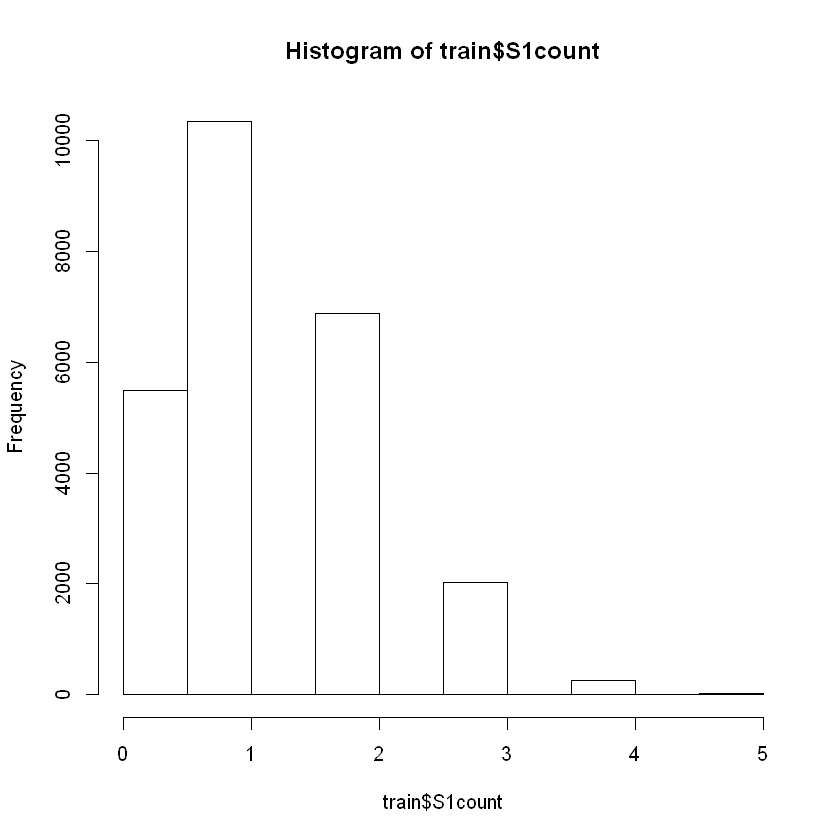

In [8]:
hist(train$S1count)

In [9]:
train2 <- train[,c("C1", "C2", "C3", "C4", "C5")]

In [10]:
head(train2)

,C1,C2,C3,C4,C5
1,9,1,2,7,8
2,4,6,12,11,7
3,11,1,7,11,1
4,9,4,6,9,9
5,8,4,11,2,1
6,5,5,13,3,13


In [11]:
train3 <- t(apply(train2,1,sort))

In [12]:
head(train3)

1,2,7,8,9
4,6,7,11,12
1,1,7,11,11
4,6,9,9,9
1,2,4,8,11
3,5,5,13,13


In [13]:
train$C12diff <- abs(train3[,1] - train3[,2])
train$C23diff <- abs(train3[,2] - train3[,3])
train$C34diff <- abs(train3[,3] - train3[,4])
train$C45diff <- abs(train3[,4] - train3[,5])
train$C51diff <- abs(train3[,5] - train3[,1])

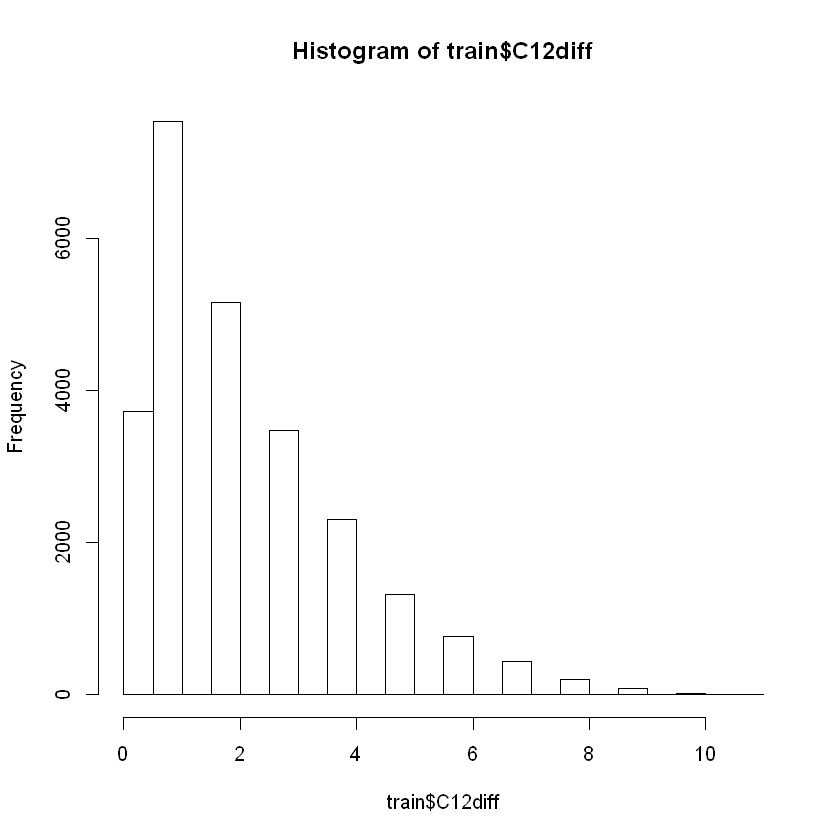

In [14]:
hist(train$C12diff)

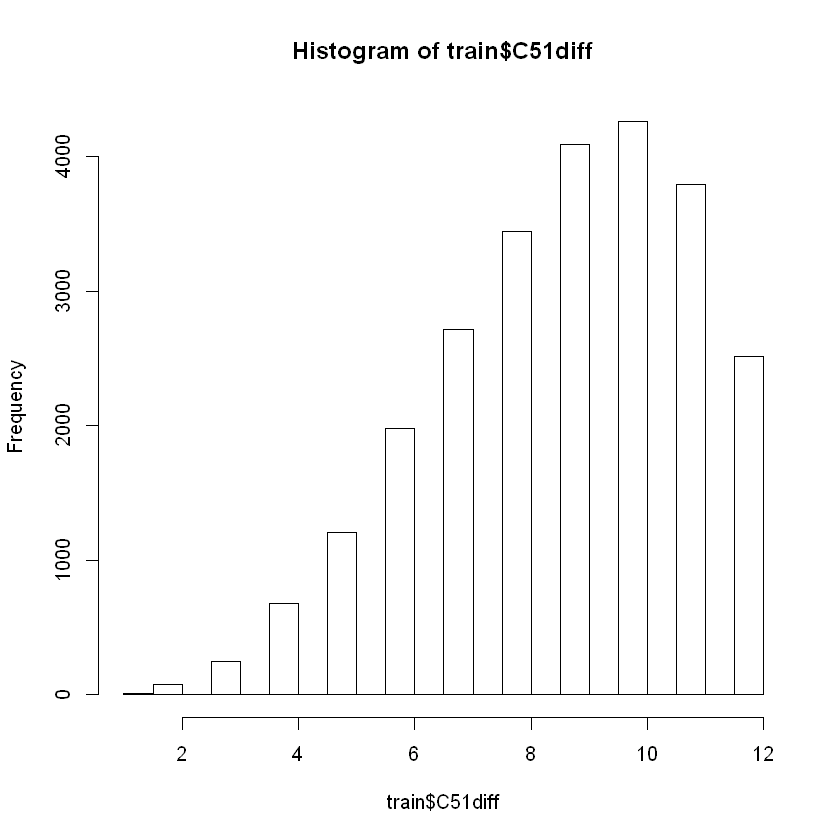

In [15]:
hist(train$C51diff)

In [16]:
train$hand <- as.factor(train$hand)
train$S1 <- NULL
train$S2 <- NULL
train$S3 <- NULL
train$S4 <- NULL
train$S5 <- NULL
train$C1 <- NULL
train$C2 <- NULL
train$C3 <- NULL
train$C4 <- NULL
train$C5 <- NULL

In [17]:
summary(train)

      hand          S1count        S2count         S3count         S4count     
 0      :12493   Min.   :0.00   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1      :10599   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 2      : 1206   Median :1.00   Median :1.000   Median :1.000   Median :1.000  
 3      :  513   Mean   :1.25   Mean   :1.246   Mean   :1.247   Mean   :1.257  
 4      :   93   3rd Qu.:2.00   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 5      :   54   Max.   :5.00   Max.   :5.000   Max.   :5.000   Max.   :5.000  
 (Other):   52                                                                 
    C12diff          C23diff          C34diff          C45diff      
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 2.000   Median : 2.000   Median : 2.000   Median : 2.000  
 Mean   : 2.167   Mean   : 2.228   Mean   : 2.198   Mean   : 2.181  
 3rd Qu.: 3.000

In [18]:
test <- read.csv("data/test.csv", header=T)
test$S1count <- 0
test$S2count <- 0
test$S3count <- 0
test$S4count <- 0
test$C12diff <- 0
test$C23diff <- 0
test$C34diff <- 0
test$C45diff <- 0
test$C51diff <- 0

test[test$S1==1,12] <- test[test$S1==1,12] + 1
test[test$S2==1,12] <- test[test$S2==1,12] + 1
test[test$S3==1,12] <- test[test$S3==1,12] + 1
test[test$S4==1,12] <- test[test$S4==1,12] + 1
test[test$S5==1,12] <- test[test$S5==1,12] + 1

test[test$S1==2,13] <- test[test$S1==2,13] + 1
test[test$S2==2,13] <- test[test$S2==2,13] + 1
test[test$S3==2,13] <- test[test$S3==2,13] + 1
test[test$S4==2,13] <- test[test$S4==2,13] + 1
test[test$S5==2,13] <- test[test$S5==2,13] + 1

test[test$S1==3,14] <- test[test$S1==3,14] + 1
test[test$S2==3,14] <- test[test$S2==3,14] + 1
test[test$S3==3,14] <- test[test$S3==3,14] + 1
test[test$S4==3,14] <- test[test$S4==3,14] + 1
test[test$S5==3,14] <- test[test$S5==3,14] + 1

test[test$S1==4,15] <- test[test$S1==4,15] + 1
test[test$S2==4,15] <- test[test$S2==4,15] + 1
test[test$S3==4,15] <- test[test$S3==4,15] + 1
test[test$S4==4,15] <- test[test$S4==4,15] + 1
test[test$S5==4,15] <- test[test$S5==4,15] + 1
test2 <- test[,c("C1", "C2", "C3", "C4", "C5")]
test3 <- t(apply(test2,1,sort))
test$C12diff <- abs(test3[,1] - test3[,2])
test$C23diff <- abs(test3[,2] - test3[,3])
test$C34diff <- abs(test3[,3] - test3[,4])
test$C45diff <- abs(test3[,4] - test3[,5])
test$C51diff <- abs(test3[,5] - test3[,1])
test$S1 <- NULL
test$S2 <- NULL
test$S3 <- NULL
test$S4 <- NULL
test$S5 <- NULL
test$C1 <- NULL
test$C2 <- NULL
test$C3 <- NULL
test$C4 <- NULL
test$C5 <- NULL

head(test)

,id,S1count,S2count,S3count,S4count,C12diff,C23diff,C34diff,C45diff,C51diff
1,1,2,1,2,0,1,1,5,2,9
2,2,1,1,2,1,1,1,1,6,9
3,3,2,3,0,0,2,1,4,3,10
4,4,2,0,2,1,3,1,1,3,8
5,5,1,3,1,0,2,0,4,2,8
6,6,2,2,1,0,2,1,3,1,7


In [19]:
summary(test)

       id             S1count         S2count         S3count     
 Min.   :      1   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 250001   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000  
 Median : 500001   Median :1.000   Median :1.000   Median :1.000  
 Mean   : 500001   Mean   :1.251   Mean   :1.248   Mean   :1.252  
 3rd Qu.: 750000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :1000000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
    S4count        C12diff          C23diff          C34diff      
 Min.   :0.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:1.00   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median :1.00   Median : 2.000   Median : 2.000   Median : 2.000  
 Mean   :1.25   Mean   : 2.174   Mean   : 2.211   Mean   : 2.212  
 3rd Qu.:2.00   3rd Qu.: 3.000   3rd Qu.: 3.000   3rd Qu.: 3.000  
 Max.   :5.00   Max.   :12.000   Max.   :12.000   Max.   :12.000  
    C45diff          C51diff      
 Min.   : 0.000   Min.   : 

### *모형 생성*
- 기계학습 모형에는 Knn, SVM, 로지스틱 등등 많지만 여기서 소개하는 것은 랜덤 포레스트
- R로 학습. 하트,스테이드,다이아,클루버를 카운트함. S1count, S2count, S3count, S4count

![그림참고](http://kawahara.ca/wp-content/uploads/randomForest.png)
![그림참고](http://cdn-ak.f.st-hatena.com/images/fotolife/k/kazoo04/20131204/20131204173330.png)

> #### **랜덤포레스트 알고리즘 설명**
 + A random forest is a classifier that consists of many decision trees and outputs the class that is the mode of the classes output by individual trees
 + The algorithm for inducing a random forest was developed by Leo Breiman and Adele Cutler, and Random Forests is their trademark. 
 + The term came from random decision forests that was first proposed by Tin Kam Ho of Bell Labs in 1995. 
 + The method combines Breiman's bagging idea and Ho's random subspace method to construct a collection of decision trees with controlled variations.
 + Let the number of training cases be N, and the number of variables in the classifier be M. 
 + We are told the number m of input variables to be used to determine the decision at a node of the tree; m should be much less than M. 
 + Choose a training set for this tree by choosing N times with replacement from all N available training cases (i.e. take a bootstrap sample). Use the rest of the cases to estimate the error of the tree, by predicting their classes. 
 + For each node of the tree, randomly choose m variables on which to base the decision at that node. Calculate the best split based on these m variables in the training set. 
 + Each tree is fully grown and not pruned (as may be done in constructing a normal tree classifier).

In [21]:
set.seed(2310)

In [25]:
install.packages("randomForest", dependencies=T, repos='http://cran.rstudio.com/') 

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


In [26]:
library(randomForest)
rf <- randomForest(train[,-1], train[,1], xtest=test[,-1], ntree=100, mtry=9)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [28]:
predictions <- levels(train$hand)[rf$test$predicted]
r <- data.frame(predictions)
id <- 1:1000000
id <- data.frame(id)
r <- cbind(id, r)
colnames(r) <- c("id", "hand")

In [30]:
write.csv(r, "data/result/randomForest_100_mtry9.csv", row.names = FALSE)

## Poker Rule induction Leaderboard
https://www.kaggle.com/c/poker-rule-induction/leaderboard

# 2번째 발표자료 What's Cooking 요리법 분류
## https://www.kaggle.com/c/whats-cooking/
![](https://kaggle2.blob.core.windows.net/competitions/kaggle/4526/logos/front_page.png)

- 사용한 레시피 성분을 보고 요리를 분류해보자~!!!
- 당신은 무엇을 보는가 ... 지역, 노천 시장을 산책하면서 당신은 무엇을 냄새맡습니까? 당신은 오늘 저녁 무엇을 할 것인가?
- 당신은 북부 캘리포니아에 있다면, 당신은 잎이 많은 채소의 피할 수 부셸 과거 걷고있을 것이다, 어두운 자주색 양배추와 밝은 핑크와 근대의 노랑으로 스파이크. 바다의 냄새 근처 꿈틀 오징어로 주목을 받고있는 동안 한국에서 전 세계에 걸쳐, 밝은 빨간 김치의 고분, 당신을 맞이합니다. 마찬가지로 지금까지 눈을 볼 수 있습니다 심황, 스타 아니스, 양 귀 비 씨앗, 그리고 가람 마살라 : 인도의 시장은 향신료의 수십 풍부한 색채와 향기에서 아마도 가장 화려한 맞이합니다.
- 우리의 강한 지리적, 문화적 협회의 일부는 지역의 현지 음식에 묶여있다. 이 놀이터 대회는 재료의 목록 주어진 접시의 요리의 범주를 예측하도록 요청합니다.

- 재료의 목록을 보고 요리의 범주(국가)를 예측하는 문제. 
- http://www.yummly.com/
- 문제 : 한국 요리 중에서 가장 많이 쓰이는 재료는 무엇일까요~~~??

![](http://s.yumm.ly/promoted/en-US/homepage/2015-11-09/hero.jpg)

~~~~
json 형태 파일
{
 "id": 24717,
 "cuisine": "indian",
 "ingredients": [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 },
~~~~

- train.json - the training set containing recipes id, type of cuisine, and list of ingredients
- test.json - the test set containing recipes id, and list of ingredients
- sample_submission.csv - a sample submission file in the correct format

- 평가방법 (Submissions are evaluated on the categorization accuracy (the percent of dishes that you correctly classify).
![](https://docs.wso2.com/download/attachments/47520050/Multiclass_Classification_Matrix_Definition.png?version=1&modificationDate=1441305075000&api=v2)
![](https://docs.wso2.com/download/attachments/47520050/Multi_Class_Classification.png?version=2&modificationDate=1441304458000&api=v2)

In [31]:
install.packages(c('rzmq','repr','IRkernel','IRdisplay'), repos = 'http://irkernel.github.io/')


  바이너리 버전을 이용할 수 있습니다 (그리고 설치되어질 것입니다)
  그러나 소스 버전은 추후에 제공될 것입니다:
     binary source
repr    0.3    0.4

package 'rzmq' successfully unpacked and MD5 sums checked


Warning message:
: cannot remove prior installation of package 'rzmq'

package 'repr' successfully unpacked and MD5 sums checked
package 'IRkernel' successfully unpacked and MD5 sums checked
package 'IRdisplay' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


In [32]:
install.packages("jsonlite", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("dplyr", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("ggplot2", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("tm", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("caret", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("rpart.plot", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("SnowballC", dependencies=T, repos='http://cran.rstudio.com/') 

also installing the dependencies 'memoise', 'mime', 'bitops', 'crayon', 'praise', 'evaluate', 'formatR', 'highr', 'markdown', 'yaml', 'htmltools', 'caTools', 'R.methodsS3', 'R.oo', 'R.utils', 'R.cache', 'curl', 'testthat', 'knitr', 'rmarkdown', 'R.rsp'



package 'memoise' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'bitops' successfully unpacked and MD5 sums checked
package 'crayon' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'evaluate' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'highr' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked
package 'R.cache' successfully unpacked and MD5 sums checked
package 'curl' successfully un

Warning message:
: cannot remove prior installation of package 'jsonlite'


The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


also installing the dependencies 'chron', 'assertthat', 'R6', 'magrittr', 'lazyeval', 'DBI', 'RSQLite', 'RMySQL', 'RPostgreSQL', 'data.table', 'microbenchmark', 'Lahman', 'nycflights13'



package 'chron' successfully unpacked and MD5 sums checked
package 'assertthat' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'lazyeval' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'RMySQL' successfully unpacked and MD5 sums checked
package 'RPostgreSQL' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'Lahman' successfully unpacked and MD5 sums checked
package 'nycflights13' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


also installing the dependencies 'sp', 'mapproj', 'maps', 'hexbin', 'maptools'



package 'sp' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'maps' successfully unpacked and MD5 sums checked
package 'hexbin' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


Warning message:
: dependencies 'Rcampdf', 'Rgraphviz', 'Rpoppler', 'tm.lexicon.GeneralInquirer' are not availablealso installing the dependencies 'NLP', 'slam', 'filehash', 'SnowballC'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'filehash' successfully unpacked and MD5 sums checked
package 'SnowballC' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


Warning message:
: dependency 'rPython' is not availablealso installing the dependencies 'minqa', 'nloptr', 'profileModel', 'plotrix', 'pbkrtest', 'lme4', 'brglm', 'gtools', 'plotmo', 'TeachingDemos', 'combinat', 'modeltools', 'strucchange', 'coin', 'car', 'BradleyTerry2', 'e1071', 'earth', 'fastICA', 'gam', 'ipred', 'kernlab', 'klaR', 'ellipse', 'mda', 'party', 'pls', 'pROC', 'proxy', 'RANN', 'spls', 'subselect', 'pamr', 'superpc', 'Cubist'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'profileModel' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'brglm' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'plotmo' successfully unpacked and MD5 sums checked
package 'TeachingDemos' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked
package 'BradleyTerry2' successfully unpacked and MD5 sums checked
package 'e1071'

In [33]:
library(jsonlite)
library(dplyr)
library(ggplot2)
library(tm) # For NLP; creating bag-of-words
library(caret)
library(rpart)
library(rpart.plot)
library(SnowballC)

ERROR: Error in library(jsonlite): there is no package called 'jsonlite'



Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: lattice


In [35]:
setwd("E:/Dropbox/kaggle/problems/2015_10_cooking")
load("json.Rdata")

In [36]:
ls()
head(train)

[1] "id"          "predictions" "r"           "rf"          "test"       
 [6] "test2"       "test3"       "train"       "train2"      "train3"

,id,cuisine,ingredients
1,10259,greek,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles"
2,25693,southern_us,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil"
3,20130,filipino,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers"
4,22213,indian,"water, vegetable oil, wheat, salt"
5,13162,indian,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf"
6,6602,jamaican,"plain flour, sugar, butter, eggs, fresh ginger root, salt, ground cinnamon, milk, vanilla extract, ground ginger, powdered sugar, baking powder"


~~~~
ID 요리 재료
1 10259 그리스어로 메인 양상추, 블랙 올리브, 포도, 토마토, 마늘, 고추, 보라색 양파, 조미료, garbanzo 콩, 죽은 태아의 치즈는 잘게
2 25693 southern_us 일반 밀가루, 후추, 소금, 토마토, 지상 후추, 타임, 계란, 녹색 토마토, 노란 옥수수 가루, 우유, 식물성 기름
3 20130 필리핀 계란, 후추, 소금, mayonaise, 기름, 녹색 고추, 구운 닭 가슴살, 마늘 분말, 노란 양파, 간장, 버터, 닭의 간 요리
4 22213 인도 물, 식물성 기름, 밀가루, 소금
5 13162 인도 후추, 골파, 옥수수 가루, 카이엔 고추, 양파, 마늘 페이스트, 우유, 버터, 소금, 레몬 주스, 물, 고추 가루, passata, 오일, 지상 커 민, 뼈없는 닭 껍질을 벗기는 허벅지, 가람 마살라, 더블 크림, 천연 요구르트, 베이 리프
6 6602 자메이카 일반 밀가루, 설탕, 버터, 계란, 신선한 생강 뿌리, 소금, 분말 계피, 우유, 바닐라 추출물, 지상 생강, 가루 설탕, 베이킹 파우더
~~~~

In [39]:
head(test)

,id,ingredients
1,18009,"baking powder, eggs, all-purpose flour, raisins, milk, white sugar"
2,28583,"sugar, egg yolks, corn starch, cream of tartar, bananas, vanilla wafers, milk, vanilla extract, toasted pecans, egg whites, light rum"
3,41580,"sausage links, fennel bulb, fronds, olive oil, cuban peppers, onions"
4,29752,"meat cuts, file powder, smoked sausage, okra, shrimp, andouille sausage, water, paprika, hot sauce, garlic cloves, browning, lump crab meat, vegetable oil, all-purpose flour, freshly ground pepper, flat leaf parsley, boneless chicken skinless thigh, dried thyme, white rice, yellow onion, ham"
5,35687,"ground black pepper, salt, sausage casings, leeks, parmigiano reggiano cheese, cornmeal, water, extra-virgin olive oil"
6,38527,"baking powder, all-purpose flour, peach slices, corn starch, heavy cream, lemon juice, unsalted butter, salt, white sugar"


~~~~
ID 성분
1 18009 베이킹 파우더, 계란, 다목적 밀가루, 건포도, 우유, 백설탕
2 28583 설탕, 달걀 노른자, 옥수수 전분, 치석, 바나나, 바닐라 웨이퍼, 우유, 바닐라 추출물, 구운 피칸, 달걀 흰자의 크림, 라이트 럼
3 41580 소시지 링크, 회향 전구, 잎, 올리브 오일, 쿠바 고추, 양파
4 29752 고기 인하, 파일 가루, 훈제 소시지, 오크라, 새우, andouille 소시지, 물, 파프리카, 핫 소스, 다진 마늘, 갈색, 덩어리 게 고기, 식물성 기름, 다목적 밀가루, 갓 지상 후추, 평면 잎 파슬리, 뼈없는 닭 껍질을 벗기는 허벅지, 말린 백리향, 흰 쌀, 노란 양파, 햄
5 35687 지상 후추, 소금, 소시지 케이싱, 부추, 파르 미자의 reggiano 치즈, 옥수수 가루, 물, 엑스트라 버진 올리브 오일
6 38527 베이킹 파우더, 다목적 밀가루, 복숭아 조각, 옥수수 전분, 무거운 크림, 레몬 주스, 무염 버터, 소금, 흰 설탕
~~~~

### 데이터 전처리 필요
- 트윗이나 다른 텍스트 데이터처럼 태그나 url이나 불필요한 자료가 없기 때문에 스페이스 기준으로 추출만 하면 됨.
- 모두 소문자이기 때문에 따로 전처리 할 필요는 없고... 불용어 제거할 필요도 없음 (명사 단어만 있기 때문에)
- 재료가 ,로 구분되어 있으니 이것만 제외해서 나눠주면 되고 문제는 단어를 몇개까지 매트릭스에 집어넣을것인가...

In [40]:
sample_sub <- read.csv('sample_submission.csv')

In [41]:
head(sample_sub)

,id,cuisine
1,35203,italian
2,17600,italian
3,35200,italian
4,17602,italian
5,17605,italian
6,17604,italian


In [42]:
ingredients <- Corpus(VectorSource(c(train$ingredients,test$ingredients)))
ingredients

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 49718

In [43]:
?Corpus #tm package Corpus~

Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/jsonlite/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In read.dcf(file.path(p, "DESCRIPTION"), c("Package", "Version")): 압축된 파일 'C:/Anaconda/R/library/rzmq/DESCRIPTION'를 열 수 없습니다.  그 이유는 아마도 'No such file or directory'입니다Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'jsonlite'Warning message:
In find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'rzmq'

Corpus {tm},R Documentation


In [44]:
ingredients <- tm_map(ingredients, stemDocument)
ingredientsDTM <- DocumentTermMatrix(ingredients)
ingredientsDTM

<<DocumentTermMatrix (documents: 49718, terms: 2886)>>
Non-/sparse entries: 927832/142558316
Sparsity           : 99%
Maximal term length: 25
Weighting          : term frequency (tf)

## Term frequency
- https://ko.wikipedia.org/wiki/TF-IDF
- TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값으로, 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다. 하지만 단어 자체가 문서군 내에서 자주 사용되는 경우, 이것은 그 단어가 흔하게 등장한다는 것을 의미한다. 이것을 DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다. TF-IDF는 TF와 IDF를 곱한 값이다.

In [45]:
sparse <- removeSparseTerms(ingredientsDTM, 0.99)
sparse

<<DocumentTermMatrix (documents: 49718, terms: 250)>>
Non-/sparse entries: 808758/11620742
Sparsity           : 93%
Maximal term length: 13
Weighting          : term frequency (tf)

In [46]:
ingredientsDTM <- as.data.frame(as.matrix(sparse))
head(ingredientsDTM)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [47]:
ingredientsDTM_train <- ingredientsDTM[1:39774,]
ingredientsDTM_test <- ingredientsDTM[39775:49718,]
dim(ingredientsDTM_train)
dim(ingredientsDTM_test)

[1] 39774   250

[1] 9944  250

In [48]:
ingredientsDTM_train$cuisine <- as.factor(train$cuisine)
ingredientsDTM_test$cuisine <- NA
head(ingredientsDTM_train)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini,cuisine
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,greek
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,southern_us
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,filipino
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,indian
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,

In [49]:
inTrain <- createDataPartition(y = ingredientsDTM_train$cuisine, p = 0.6, list = FALSE)
train_data <- ingredientsDTM_train[inTrain,]
vaild_data <- ingredientsDTM_train[-inTrain,]

In [50]:
test_data <- ingredientsDTM_test

In [51]:
ingredients_sum <- apply(rbind(ingredientsDTM_train[,-251], ingredientsDTM_test[,-251]), 2, sum)
head(ingredients_sum)

all-purpos    allspic     almond        and       appl    avocado 
      5820        682       1452        622       1036       1614

In [52]:
ingredients_sum <- ingredients_sum[order(ingredients_sum, decreasing=T)]
names(ingredients_sum)

[1] "pepper"        "salt"          "oil"           "onion"        
  [5] "garlic"        "fresh"         "ground"        "sauc"         
  [9] "sugar"         "oliv"          "chees"         "chicken"      
 [13] "tomato"        "black"         "water"         "red"          
 [17] "green"         "egg"           "flour"         "powder"       
 [21] "butter"        "dri"           "chop"          "clove"        
 [25] "white"         "juic"          "chili"         "cream"        
 [29] "rice"          "cilantro"      "veget"         "milk"         
 [33] "lemon"         "leav"          "larg"          "ginger"       
 [37] "corn"          "vinegar"       "lime"          "soy"          
 [41] "all-purpos"    "cumin"         "broth"         "bell"         
 [45] "wine"          "parsley"       "seed"          "bean"         
 [49] "cook"          "sesam"         "grate"         "breast"       
 [53] "carrot"        "kosher"        "basil"         "beef"         
 [57] "bake"          "brown"         "chile"         "past"         
 [61] "unsalt"        "potato"        "parmesan"      "oregano"      
 [65] "extra-virgin"  "boneless"      "shred"         "tortilla"     
 [69] "cinnamon"      "season"        "thyme"         "pork"         
 [73] "mushroom"      "shrimp"        "dice"          "yellow"       
 [77] "bread"         "skinless"      "vanilla"       "coconut"      
 [81] "sodium"        "coriand"       "celeri"        "bay"          
 [85] "cayenn"        "minc"          "leaf"          "crush"        
 [89] "whole"         "spray"         "flake"         "sour"         
 [93] "scallion"      "slice"         "starch"        "paprika"      
 [97] "stock"         "hot"           "purpl"         "cheddar"      
[101] "fish"          "orang"         "mustard"       "jalapeno"     
[105] "extract"       "peanut"        "curri"         "sausag"       
[109] "frozen"        "sweet"         "low"           "shallot"      
[113] "sea"           "pea"           "fat"           "light"        
[117] "mozzarella"    "honey"         "heavi"         "noodl"        
[121] "italian"       "mint"          "spinach"       "salsa"        
[125] "roast"         "canola"        "avocado"       "peel"         
[129] "cabbag"        "pasta"         "bacon"         "lettuc"       
[133] "yogurt"        "cucumb"        "almond"        "yolk"         
[137] "fillet"        "flat"          "whip"          "masala"       
[141] "nutmeg"        "dark"          "soda"          "granul"       
[145] "buttermilk"    "crumb"         "halv"          "turmer"       
[149] "plum"          "rib"           "jack"          "garam"        
[153] "steak"         "zucchini"      "fine"          "zest"         
[157] "plain"         "toast"         "mix"           "chocol"       
[161] "free"          "smoke"         "thigh"         "peppercorn"   
[165] "appl"          "rosemari"      "sprig"         "mayonais"     
[169] "babi"          "tumer"         "yeast"         "stick"        
[173] "reduc"         "cardamom"      "thai"          "ricotta"      
[177] "chines"        "coars"         "wedg"          "raisin"       
[181] "low-fat"       "worcestershir" "ham"           "cider"        
[185] "feta"          "fennel"        "cherri"        "kernel"       
[189] "meat"          "taco"          "tofu"          "sherri"       
[193] "turkey"        "chive"         "wheat"         "ice"          
[197] "syrup"         "eggplant"      "pecan"         "warm"         
[201] "medium"        "shiitak"       "balsam"        "monterey"     
[205] "lamb"          "oyster"        "chipotl"       "dijon"        
[209] "root"          "chip"          "serrano"       "lean"         
[213] "less"          "unsweeten"     "allspic"       "condens"      
[217] "caper"         "cold"          "firm"          "broccoli"     
[221] "mexican"       "ketchup"       "boil"          "cornmeal"     
[225] "crumbl"        "mirin"         "and"           "greek"        
[229] "saffr

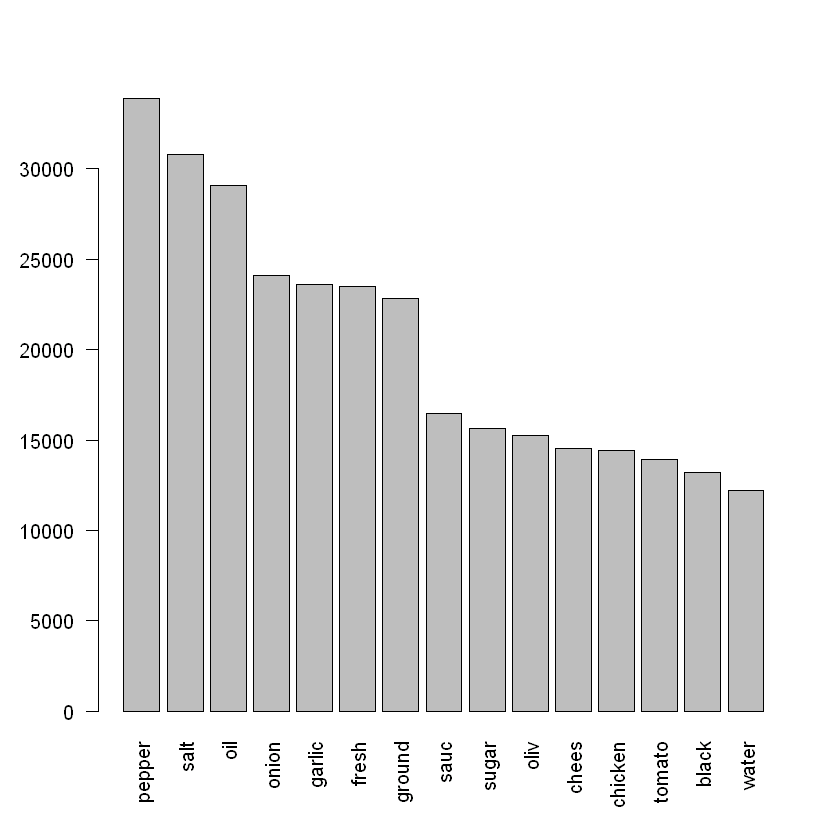

In [53]:
barplot(ingredients_sum[1:15], las=2)

### 상위 15개 재료 
- pepper, salt, oil, onion, garlic, fresh, ground, sauc, sugar, oliv, chees, chicken, tomato, black, water)
- 후추, 소금, 기름, 양파, 마늘... 

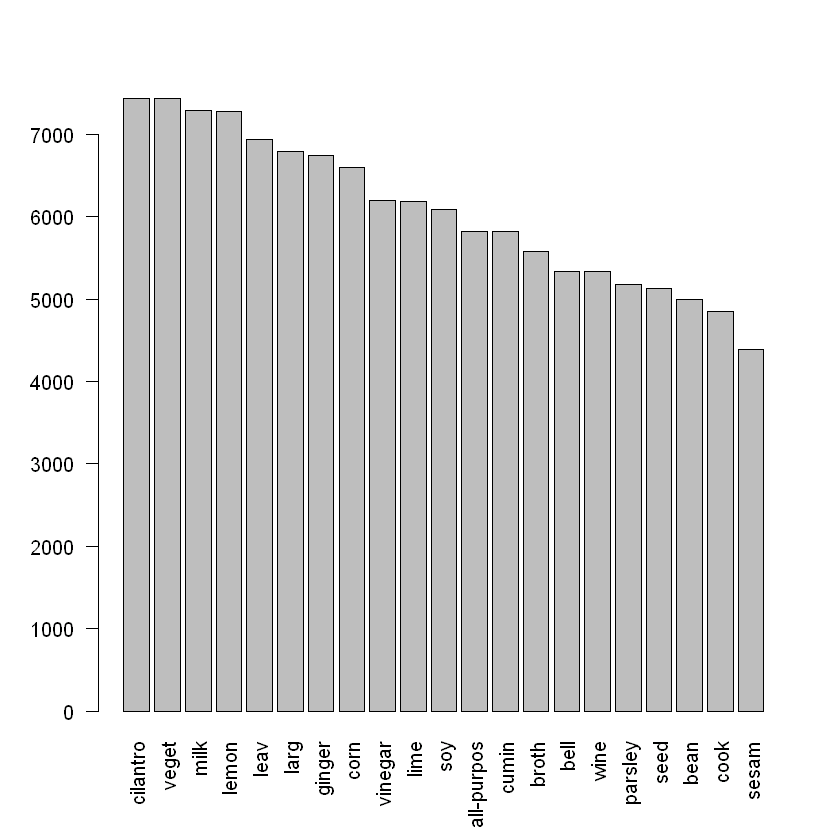

In [54]:
barplot(ingredients_sum[30:50], las=2)

In [55]:
aggregate(ingredientsDTM_train[,c(1:250)], list(ingredientsDTM_train[,251]), sum)

,Group.1,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,brazilian,18,1,24,2,10,10,3,30,19,0,2,54,71,0,31,80,133,4,16,13,17,0,33,21,83,2,0,13,1,0,26,23,7,5,56,5,76,0,23,41,0,4,5,2,35,76,2,88,14,92,7,142,12,68,1,28,22,34,4,3,35,9,0,32,2,29,2,5,21,4,0,1,0,62,105,0,0,13,18,5,3,0,25,8,0,27,33,10,73,5,133,32,1,194,31,1,21,21,0,85,126,3,17,7,0,12,22,57,5,3,19,104,0,4,1,22,2,33,33,1,63,2,37,3,1,16,164,10,5,1,10,3,10,0,229,15,7,0,6,2,5,2,5,0,5,247,145,226,50,14,1,19,24,55,21,1,16,10,3,6,310,1,3,9,35,26,63,8,6,86,2,18,63,0,11,4,2,3,1,7,246,35,30,8,19,7,26,7,2,5,1,2,3,0,9,15,58,10,22,16,8,16,2,6,3,0,6,3,1,4,2,22,12,4,29,150,18,61,16,0,1,6,13,5,1,133,1,3,5,4,26,29,28,46,26,2,112,15,3,4,91,15,30,2,6,34,3,22,8,3
2,british,238,27,44,3,30,0,2,25,217,17,5,42,15,0,158,4,134,18,3,81,4,1,36,109,436,26,10,18,4,2,61,32,26,60,108,16,30,0,1,8,0,4,0,18,32,66,9,5,68,57,17,6,22,11,22,23,7,57,11,13,268,37,1,7,4,8,19,44,3,22,5,12,0,157,436,0,0,19,85,10,3,0,35,12,2,14,14,6,467,12,180,57,2,94,54,53,37,54,4,26,312,4,7,104,0,16,16,15,2,0,1,65,0,1,7,61,14,164,26,20,48,18,125,0,3,40,5,8,8,2,7,8,14,0,287,16,14,0,32,0,0,58,76,0,70,201,77,215,55,8,0,22,11,52,29,0,30,2,12,35,276,10,39,4,46,144,213,11,62,50,2,16,23,0,18,2,23,2,21,0,516,83,42,4,26,11,23,1,1,19,20,6,23,1,6,12,3,4,23,17,85,9,3,23,5,0,5,12,10,4,2,32,26,9,49,454,21,11,41,0,1,0,62,7,0,53,0,9,2,3,193,2,119,82,71,15,178,8,15,82,168,77,66,53,41,26,8,67,21,3
3,cajun_creole,291,18,12,39,14,4,17,62,64,8,94,360,164,0,79,696,496,23,152,133,176,3,348,111,498,33,15,84,30,1,53,399,619,20,174,9,741,3,28,142,0,5,3,22,11,544,19,26,46,329,29,9,10,17,26,299,10,145,23,24,206,49,5,89,0,57,1,14,277,33,13,5,18,646,237,4,0,47,54,51,9,1,75,41,4,12,69,50,450,31,546,52,0,1003,6,6,51,58,0,913,679,61,94,74,0,14,286,15,45,16,50,196,3,27,23,108,0,223,158,13,297,7,253,24,40,42,23,76,17,0,80,73,109,2,165,121,3,0,46,8,11,83,133,6,26,821,402,1314,36,225,30,262,58,369,99,27,32,31,40,39,2326,17,6,26,61,58,450,38,9,555,36,183,537,1,33,0,27,2,16,2,993,665,463,97,36,631,34,4,1,23,7,15,8,1,6,25,473,125,100,198,26,107,35,25,14,5,18,75,26,2,8,28,16,6,148,310,76,7,18,1,0,55,428,8,1,673,6,1,62,1,119,3,74,313,72,24,340,16,5,41,371,77,105,195,56,146,3,34,13,13
4,chinese,129,0,46,36,26,9,92,26,100,32,34,14,330,109,167,261,529,56,391,15,460,171,368,363,112,2,251,187,0,5,379,36,113,2,33,12,1330,1,147,588,604,0,1,63,4,217,47,245,65,497,44,44,91,9,9,355,50,1005,2,12,54,6,2,157,61,16,23,364,21,8,1,8,9,3

In [56]:
aggregate(ingredientsDTM_train[,c(1:250)], list(ingredientsDTM_train[,251]), mean)

,Group.1,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini
1,brazilian,0.0385439,0.002141328,0.05139186,0.004282655,0.02141328,0.02141328,0.006423983,0.06423983,0.04068522,0,0.004282655,0.1156317,0.1520343,0,0.06638116,0.1713062,0.2847966,0.00856531,0.03426124,0.02783726,0.03640257,0,0.07066381,0.04496788,0.1777302,0.004282655,0,0.02783726,0.002141328,0,0.05567452,0.04925054,0.01498929,0.01070664,0.1199143,0.01070664,0.1627409,0,0.04925054,0.08779443,0,0.00856531,0.01070664,0.004282655,0.07494647,0.1627409,0.004282655,0.1884368,0.02997859,0.1970021,0.01498929,0.3040685,0.02569593,0.1456103,0.002141328,0.05995717,0.04710921,0.07280514,0.00856531,0.006423983,0.07494647,0.01927195,0,0.06852248,0.004282655,0.0620985,0.004282655,0.01070664,0.04496788,0.00856531,0,0.002141328,0,0.1327623,0.2248394,0,0,0.02783726,0.0385439,0.01070664,0.006423983,0,0.05353319,0.01713062,0,0.05781585,0.07066381,0.02141328,0.1563169,0.01070664,0.2847966,0.06852248,0.002141328,0.4154176,0.06638116,0.002141328,0.04496788,0.04496788,0,0.1820128,0.2698073,0.006423983,0.03640257,0.01498929,0,0.02569593,0.04710921,0.1220557,0.01070664,0.006423983,0.04068522,0.2226981,0,0.00856531,0.002141328,0.04710921,0.004282655,0.07066381,0.07066381,0.002141328,0.1349036,0.004282655,0.07922912,0.006423983,0.002141328,0.03426124,0.3511777,0.02141328,0.01070664,0.002141328,0.02141328,0.006423983,0.02141328,0,0.490364,0.03211991,0.01498929,0,0.01284797,0.004282655,0.01070664,0.004282655,0.01070664,0,0.01070664,0.5289079,0.3104925,0.48394,0.1070664,0.02997859,0.002141328,0.04068522,0.05139186,0.117773,0.04496788,0.002141328,0.03426124,0.02141328,0.006423983,0.01284797,0.6638116,0.002141328,0.006423983,0.01927195,0.07494647,0.05567452,0.1349036,0.01713062,0.01284797,0.1841542,0.004282655,0.0385439,0.1349036,0,0.0235546,0.00856531,0.004282655,0.006423983,0.002141328,0.01498929,0.5267666,0.07494647,0.06423983,0.01713062,0.04068522,0.01498929,0.05567452,0.01498929,0.004282655,0.01070664,0.002141328,0.004282655,0.006423983,0,0.01927195,0.03211991,0.124197,0.02141328,0.04710921,0.03426124,0.01713062,0.03426124,0.004282655,0.01284797,0.006423983,0,0.01284797,0.006423983,0.002141328,0.00856531,0.004282655,0.04710921,0.02569593,0.00856531,0.0620985,0.3211991,0.0385439,0.130621,0.03426124,0,0.002141328,0.01284797,0.02783726,0.01070664,0.002141328,0.2847966,0.002141328,0.006423983,0.01070664,0.00856531,0.05567452,0.0620985,0.05995717,0.09850

In [57]:
ingredientsDTM_train_korea <- ingredientsDTM_train[ingredientsDTM_train$cuisine == "korean",]
head(ingredientsDTM_train_korea)

,all-purpos,allspic,almond,and,appl,avocado,babi,bacon,bake,balsam,basil,bay,bean,beansprout,beef,bell,black,boil,boneless,bread,breast,broccoli,broth,brown,butter,buttermilk,cabbag,canola,caper,cardamom,carrot,cayenn,celeri,cheddar,chees,cherri,chicken,chickpea,chile,chili,chines,chip,chipotl,chive,chocol,chop,cider,cilantro,cinnamon,clove,coars,coconut,cold,condens,confection,cook,coriand,corn,cornmeal,crack,cream,crumb,crumbl,crush,cucumb,cumin,curri,dark,dice,dijon,dill,dough,dress,dri,egg,eggplant,enchilada,extra-virgin,extract,fat,fennel,feta,fillet,fine,firm,fish,flake,flat,flour,free,fresh,frozen,garam,garlic,ginger,golden,granul,grate,greek,green,ground,halv,ham,heavi,hoisin,honey,hot,ice,italian,jack,jalapeno,juic,kalamata,kernel,ketchup,kosher,lamb,larg,leaf,lean,leav,leek,lemon,less,lettuc,light,lime,low,low-fat,masala,mayonais,meat,medium,mexican,milk,minc,mint,mirin,mix,monterey,mozzarella,mushroom,mustard,noodl,nutmeg,oil,oliv,onion,orang,oregano,oyster,paprika,parmesan,parsley,past,pasta,pea,peanut,pecan,peel,pepper,peppercorn,plain,plum,pork,potato,powder,purpl,raisin,red,reduc,rib,rice,ricotta,roast,root,rosemari,saffron,sage,salsa,salt,sauc,sausag,scallion,sea,season,seed,serrano,sesam,shallot,sharp,shell,sherri,shiitak,shoulder,shred,shrimp,skinless,slice,smoke,soda,sodium,soup,sour,soy,spaghetti,spinach,spray,sprig,spring,squash,starch,steak,stick,stock,sugar,sweet,sweeten,syrup,taco,thai,thigh,thyme,toast,tofu,tomato,tortilla,tumer,turkey,turmer,unsalt,unsweeten,vanilla,veget,vinegar,warm,water,wedg,wheat,whip,white,whole,wine,worcestershir,yeast,yellow,yogurt,yolk,zest,zucchini,cuisine
67,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
110,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,korean
141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
ingredients_korea_sum <- apply(ingredientsDTM_train_korea[,-251], 2, sum)
ingredients_korea_mean <- apply(ingredientsDTM_train_korea[,-251], 2, mean)

In [59]:
ingredients_korea_sum <- ingredients_korea_sum[order(ingredients_korea_sum, decreasing=T)]
ingredients_korea_mean <- ingredients_korea_mean[order(ingredients_korea_mean, decreasing=T)]

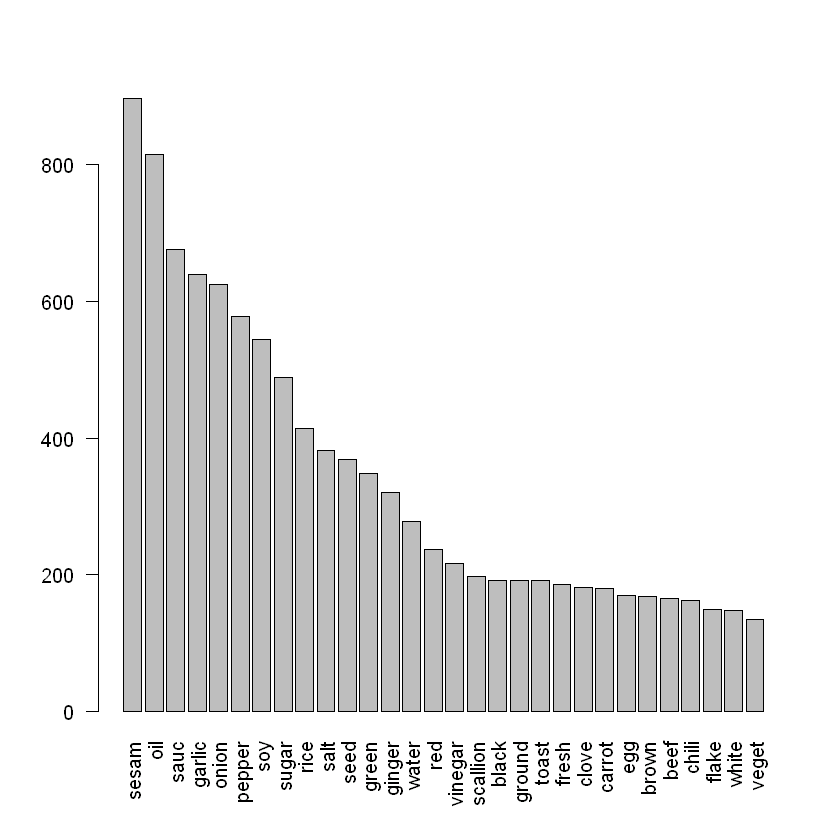

In [60]:
barplot(ingredients_korea_sum[1:30], las=2)

In [61]:
names(ingredients_korea_sum)

[1] "sesam"         "oil"           "sauc"          "garlic"       
  [5] "onion"         "pepper"        "soy"           "sugar"        
  [9] "rice"          "salt"          "seed"          "green"        
 [13] "ginger"        "water"         "red"           "vinegar"      
 [17] "scallion"      "black"         "ground"        "toast"        
 [21] "fresh"         "clove"         "carrot"        "egg"          
 [25] "brown"         "beef"          "chili"         "flake"        
 [29] "white"         "veget"         "minc"          "cabbag"       
 [33] "chicken"       "past"          "rib"           "pork"         
 [37] "mushroom"      "flour"         "steak"         "sodium"       
 [41] "wine"          "cucumb"        "honey"         "chile"        
 [45] "shiitak"       "kosher"        "cook"          "dark"         
 [49] "tofu"          "corn"          "spinach"       "bean"         
 [53] "powder"        "juic"          "fish"          "mirin"        
 [57] "noodl"         "zucchini"      "larg"          "potato"       
 [61] "low"           "crush"         "starch"        "canola"       
 [65] "lettuc"        "spring"        "syrup"         "chop"         
 [69] "dri"           "sweet"         "oliv"          "hot"          
 [73] "yellow"        "leav"          "broth"         "light"        
 [77] "sea"           "firm"          "stock"         "beansprout"   
 [81] "all-purpos"    "bell"          "shrimp"        "appl"         
 [85] "boneless"      "granul"        "roast"         "slice"        
 [89] "babi"          "reduc"         "chive"         "peel"         
 [93] "chines"        "cold"          "lemon"         "oyster"       
 [97] "shred"         "peanut"        "cilantro"      "meat"         
[101] "cayenn"        "coars"         "jalapeno"      "root"         
[105] "butter"        "spray"         "chees"         "ketchup"      
[109] "mustard"       "thigh"         "cider"         "sherri"       
[113] "lean"          "lime"          "paprika"       "skinless"     
[117] "bake"          "breast"        "leaf"          "medium"       
[121] "season"        "tortilla"      "yolk"          "leek"         
[125] "mayonais"      "pea"           "shoulder"      "soda"         
[129] "bacon"         "coconut"       "fillet"        "orang"        
[133] "purpl"         "ice"           "mix"           "shallot"      
[137] "tomato"        "cheddar"       "cinnamon"      "coriand"      
[141] "cream"         "extract"       "lamb"          "milk"         
[145] "celeri"        "thai"          "turkey"        "wheat"        
[149] "whole"         "balsam"        "boil"          "broccoli"     
[153] "eggplant"      "extra-virgin"  "fat"           "flat"         
[157] "free"          "golden"        "hoisin"        "plain"        
[161] "sausag"        "serrano"       "squash"        "stick"        
[165] "unsalt"        "vanilla"       "warm"          "bay"          
[169] "bread"         "crack"         "dijon"         "dress"        
[173] "frozen"        "ham"           "heavi"         "parsley"      
[177] "smoke"         "sour"          "zest"          "avocado"      
[181] "basil"         "buttermilk"    "chip"          "curri"        
[185] "fine"          "less"          "pasta"         "peppercorn"   
[189] "plum"          "raisin"        "yeast"         "almond"       
[193] "chickpea"      "crumb"         "cumin"         "dice"         
[197] "dough"         "grate"         "greek"         "halv"         
[201] "jack"          "kernel"        "mozzarella"    "rosemari"     
[205] "salsa"         "sharp"         "shell"         "spaghetti"    
[209] "thyme"         "worcestershir" "yogurt"        "allspic"      
[213] "and"           "caper"         "cardamom"      "cherri"       
[217] "chipotl"       "chocol"        "condens"       "confection"   
[221] "cornmeal"      "crumbl"        "dill"          "enchilada"    
[225] "fennel"        "feta"          "garam"         "italian"      
[229] "kalam

### 한국 재료
- "SESAM(참깨)" "기름" "sauc(소스)" "마늘", "양파" "고추" "콩" "설탕" "쌀", "소금" "씨" "녹색" "생강" "물" "빨간색" "식초" "scallion(파) ""땅 ""토스트 ""신선한 ""정향 ""당근 ""달걀 ""갈색 ""쇠고기 ""고추 ""찌 ""화이트 ""veget", "MINC ""cabbag ""닭 "" "블랙" 과거 ","갈비 ""돼지 고기 ","버섯 ","밀가루 ""스테이크 ""나트륨 ""와인 ""cucumb ""꿀 ""칠레 ""shiitak ""정결 한 ""요리 ""어두운 ""두부 ""옥수수 " "시금치" "콩" "분말"...

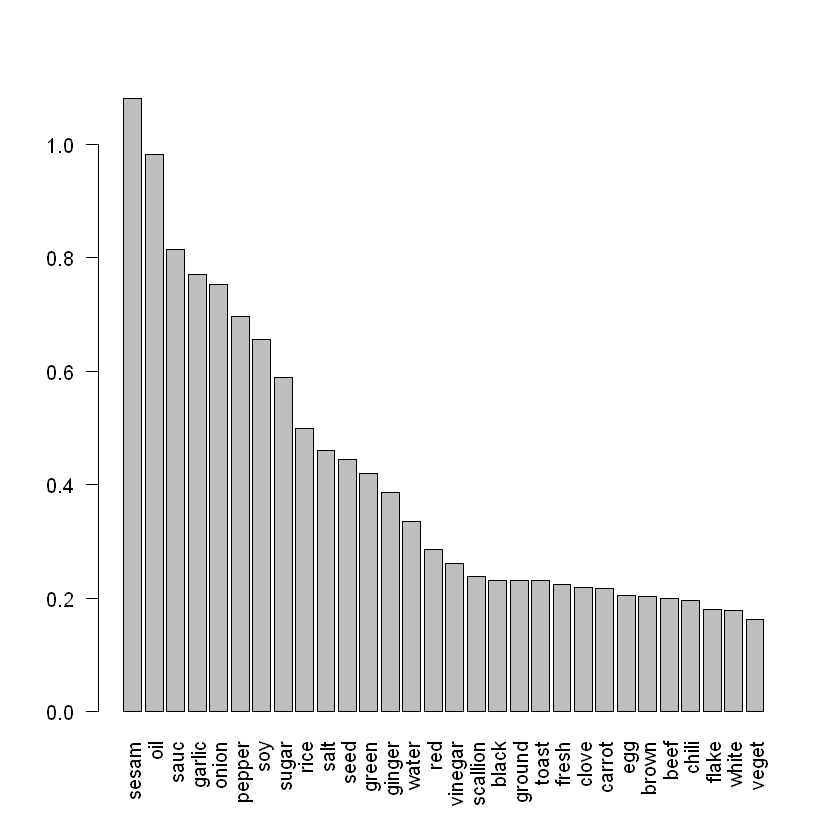

In [62]:
barplot(ingredients_korea_mean[1:30], las=2)

In [63]:
cartModelFit <- rpart(cuisine ~ ., data = train_data, method = "class")

In [64]:
cartModelFit

n= 23871 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 23871 19168 italian (0.012 0.02 0.039 0.067 0.019 0.067 0.03 0.075 0.017 0.2 0.013 0.036 0.021 0.16 0.021 0.012 0.11 0.025 0.039 0.021)  
    2) tortilla< 0.5 22339 17648 italian (0.013 0.022 0.041 0.071 0.02 0.071 0.031 0.081 0.018 0.21 0.014 0.038 0.022 0.11 0.022 0.013 0.12 0.026 0.041 0.022)  
      4) soy>=0.5 2756  1531 chinese (0.00073 0.00036 0.0036 0.44 0.062 0.0018 0.0022 0.0076 0.0018 0.0025 0.02 0.17 0.12 0.0062 0.0011 0 0.0076 0.00073 0.1 0.05)  
        8) mirin< 0.5 2492  1285 chinese (0.0008 0.0004 0.004 0.48 0.069 0.002 0.0024 0.0084 0.002 0.0028 0.022 0.1 0.12 0.0068 0.0012 0 0.0084 0.0008 0.11 0.054) *
        9) mirin>=0.5 264    52 japanese (0 0 0 0.068 0 0 0 0 0 0 0 0.8 0.11 0 0 0 0 0 0.011 0.011) *
      5) soy< 0.5 19583 14899 italian (0.014 0.025 0.047 0.019 0.014 0.081 0.036 0.091 0.02 0.24 0.013 0.02 0.0088 0.12 0.025 0.015 0.13 0.03 0.032 0.018)  
       10) parmesan>=0.

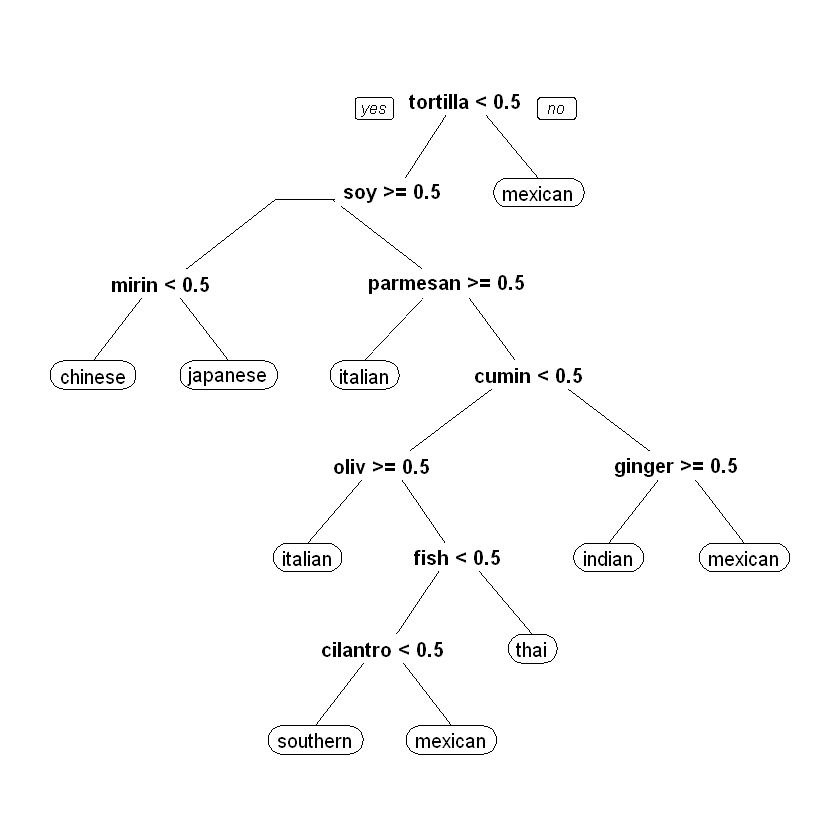

In [65]:
prp(cartModelFit)

~~~~
tortilla : 옥수수
paramesan : 치즈
soy : 대두
mirin : 미림 (일본 술의 한 종류, 조미료)
masala (향신료)
- Garam masala (from Hindi: गरम मसाला, garam ("hot") and masala (a mixture of spices)) is a blend of ground spices common in North Indian and other South Asian cuisines.[1] It is used alone or with other seasonings. The word garam refers to "heat" in the Ayurvedic sense of the word, meaning "to heat the body" as these spices, in the Ayurvedic system of medicine, elevate body temperature.
cilantro : 고수 (미나리과 살이풀)
oliv : 올리브
~~~~

## masala
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Garammasalaphoto.jpg/250px-Garammasalaphoto.jpg)


In [66]:
cartPredict <- predict(cartModelFit, newdata = vaild_data, type = "class")
head(cartPredict)
cartCM <- confusionMatrix(cartPredict, vaild_data$cuisine)

3           4           7           8          12          15 
    chinese southern_us     italian     italian     chinese     italian 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [67]:
cartCM

Confusion Matrix and Statistics

              Reference
Prediction     brazilian british cajun_creole chinese filipino french greek
  brazilian            0       0            0       0        0      0     0
  british              0       0            0       0        0      0     0
  cajun_creole         0       0            0       0        0      0     0
  chinese              1       4            4     796      115      2     0
  filipino             0       0            0       0        0      0     0
  french               0       0            0       0        0      0     0
  greek                0       0            0       0        0      0     0
  indian               0       0            0       3        0      0     1
  irish                0       0            0       0        0      0     0
  italian             44      30          161      10       14    342   307
  jamaican             0       0            0       0        0      0     0
  japanese             0       

In [68]:
install.packages("rJava", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("AUC", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("xgboost", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("RSofia", dependencies=T, repos='http://cran.rstudio.com/') 
install.packages("extraTrees", dependencies=T, repos='http://cran.rstudio.com/') 

package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages
package 'AUC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


also installing the dependencies 'jsonlite', 'stringi', 'htmlwidgets', 'rstudioapi', 'stringr', 'visNetwork', 'lmtest', 'DiagrammeR', 'Ckmeans.1d.dp', 'vcd'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
: cannot remove prior installation of package 'jsonlite'

package 'stringi' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'visNetwork' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'DiagrammeR' successfully unpacked and MD5 sums checked
package 'Ckmeans.1d.dp' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


also installing the dependency 'RUnit'



package 'RUnit' successfully unpacked and MD5 sums checked
package 'RSofia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages
package 'extraTrees' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


In [69]:
library(rJava)
library(extraTrees)
library(xgboost)
library(RSofia)
library(AUC)


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Loading required package: Rcpp
AUC 0.3.0
Type AUCNews() to see the change log and ?AUC to get an overview.

Attaching package: 'AUC'

The following objects are masked from 'package:caret':

    sensitivity, specificity



In [70]:
cartPredict <- predict(cartModelFit, newdata = vaild_data, type = "prob")
head(cartPredict)

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
3,0.0008025682,0.0004012841,0.0040128411,0.4843499197,0.0690208668,0.0020064205,0.0024077047,0.0084269663,0.0020064205,0.0028089888,0.0220706260,0.1015248796,0.1175762440,0.0068218299,0.0012038523,0.0000000000,0.0084269663,0.0008025682,0.1115569823,0.0537720706
4,0.014791063,0.043028548,0.065163426,0.032374845,0.021721142,0.109226314,0.022238312,0.058233347,0.036408771,0.138911874,0.020066198,0.032478279,0.014273893,0.089987588,0.009102193,0.025548200,0.228382292,0.017273480,0.012618949,0.008171287
7,0.01714028,0.01014885,0.04375282,0.00496166,0.00473613,0.09900767,0.09494813,0.02864231,0.00811908,0.42083897,0.00676590,0.00405954,0.00157871,0.07374831,0.02819125,0.00857014,0.04871448,0.08141633,0.00992332,0.00473613
8,0.01714028,0.01014885,0.04375282,0.00496166,0.00473613,0.09900767,0.09494813,0.02864231,0.00811908,0.42083897,0.00676590,0.00405954,0.00157871,0.07374831,0.02819125,0.00857014,0.04871448,0.08141633,0.00992332,0.00473613
12,0.0008025682,0.0004012841,0.0040128411,0.4843499197,0.0690208668,0.0020064205,0.0024077047,0.0084269663,0.0020064205,0.0028089888,0.0220706260,0.1015248796,0.1175762440,0.0068218299,0.0012038523,0.0000000000,0.0084269663,0.0008025682,0.1115569823,0.0537720706
15,0.0103448276,0.0028735632,0.0206896552,0.0011494253,0.0005747126,0.0396551724,0.0143678161,0.0017241379,0.0028735632,0.8316091954,0.0011494253,0.0011494253,0.0000000000,0.0126436782,0.0005747126,0.0011494253,0.0517241379,0.0040229885,0.0011494253,0.0005747126


In [71]:
install.packages("pROC", dependencies=T, repos='http://cran.rstudio.com/') 

also installing the dependencies 'misc3d', 'rgl', 'multicool', 'ks', 'logcondens', 'doParallel'



package 'misc3d' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'multicool' successfully unpacked and MD5 sums checked
package 'ks' successfully unpacked and MD5 sums checked
package 'logcondens' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\syleeie\Rtmp42MIgd\downloaded_packages


In [72]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:AUC':

    auc, roc

The following objects are masked from 'package:stats':

    cov, smooth, var



In [73]:
str(vaild_data$cuisine)

 Factor w/ 20 levels "brazilian","british",..: 5 8 18 10 4 10 10 19 10 10 ...


In [74]:
levels(vaild_data$cuisine)

[1] "brazilian"    "british"      "cajun_creole" "chinese"      "filipino"    
 [6] "french"       "greek"        "indian"       "irish"        "italian"     
[11] "jamaican"     "japanese"     "korean"       "mexican"      "moroccan"    
[16] "russian"      "southern_us"  "spanish"      "thai"         "vietnamese"

In [75]:
cartPredict_Prob <- apply(cartPredict, 1, which.max)
head(cartPredict_Prob)

3  4  7  8 12 15 
 4 17 10 10  4 10

In [76]:
multiclass.roc(response=vaild_data$cuisine,  predictor=cartPredict_Prob, levels=levels(vaild_data$cuisine),percent=TRUE)


Call:
multiclass.roc.default(response = vaild_data$cuisine, predictor = cartPredict_Prob,     levels = levels(vaild_data$cuisine), percent = TRUE)

Data: cartPredict_Prob with 20 levels of vaild_data$cuisine: brazilian, british, cajun_creole, chinese, filipino, french, greek, indian, irish, italian, jamaican, japanese, korean, mexican, moroccan, russian, southern_us, spanish, thai, vietnamese.
Multi-class area under the curve: 64.12%

In [77]:
cartPredict_test <- predict(cartModelFit, newdata = test_data, type = "class")
head(cartPredict_test)

39775       39776       39777       39778       39779       39780 
southern_us southern_us     italian southern_us     italian southern_us 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [78]:
head(test$id)
test_predict <- data.frame(id = test$id, cuisine = cartPredict_test)
head(test_predict)
submission <- left_join(sample_sub, test_predict, by="id")
head(submission)

[1] 18009 28583 41580 29752 35687 38527

,id,cuisine
39775,18009,southern_us
39776,28583,southern_us
39777,41580,italian
39778,29752,southern_us
39779,35687,italian
39780,38527,southern_us


,id,cuisine.x,cuisine.y
1,35203,italian,southern_us
2,17600,italian,italian
3,35200,italian,southern_us
4,17602,italian,thai
5,17605,italian,indian
6,17604,italian,japanese


In [79]:
submission <- submission[,-2]
head(submission)

,id,cuisine.y
1,35203,southern_us
2,17600,italian
3,35200,southern_us
4,17602,thai
5,17605,indian
6,17604,japanese


In [80]:
colnames(submission) <- c("id", "cuisine")

In [82]:
write.csv(submission, file = 'cart_submission.csv', row.names = F)

### Cart 제출 19.3%

In [83]:
library(extraTrees)

### RandomForest 일종의 트리. 
- thresholds를 트리마다 랜덤하게 선택 (feautre를 나무마다 다르게 선택)
![](http://www.iis.ee.ic.ac.uk/icvl/iccv09_tutorial_files/random_forest_new2.png)
### http://scikit-learn.org/stable/modules/ensemble.html

In [84]:
extraTreesModelFit <- extraTrees(train_data[,-251], train_data[,251], ntree=100, numThreads=4)

In [85]:
extraTreesModelFit

ExtraTrees:
 - # of trees: 100
 - node size:  1
 - # of dim:   250
 - # of tries: 15
 - type:       factor (classification)
 - multi-task: no

In [86]:
vaild_label_extra <- predict(extraTreesModelFit, vaild_data[,-251], probability=T)
head(vaild_label_extra) 

brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
0.02,0.01,0.02,0.25,0.14,0.00,0.00,0.03,0.00,0.02,0.11,0.06,0.07,0.09,0.01,0.00,0.04,0.00,0.10,0.03
0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.86,0.03,0.00,0.00,0.01,0.00,0.06,0.00,0.01,0.01,0.00,0.00,0.00
0.02,0.01,0.05,0.01,0.00,0.02,0.00,0.01,0.01,0.09,0.00,0.00,0.00,0.39,0.05,0.00,0.11,0.20,0.02,0.01
0.00,0.01,0.04,0.01,0.07,0.10,0.04,0.01,0.00,0.48,0.00,0.03,0.00,0.03,0.03,0.01,0.03,0.11,0.00,0.00
0.00,0.00,0.00,0.81,0.06,0.00,0.00,0.00,0.00,0.01,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05
0.00,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.05,0.53,0.00,0.00,0.00,0.01,0.00,0.00,0.22,0.00,0.00,0.00


In [87]:
vaild_label_extra2 <- predict(extraTreesModelFit, vaild_data[,-251], probability=F)
extraCM <- confusionMatrix(vaild_label_extra2, vaild_data$cuisine)

In [88]:
extraCM

Confusion Matrix and Statistics

              Reference
Prediction     brazilian british cajun_creole chinese filipino french greek
  brazilian           77       3            0       0        2      0     0
  british              1      95            3       3        0     18     1
  cajun_creole         4       4          385       2        0     12     1
  chinese              3       3            1     910       54      3     1
  filipino             5       0            0      14      138      1     1
  french               3      46           19       6        5    549    14
  greek                0       2            1       0        0      7   284
  indian               6      11            3       6        9     16    12
  irish                0      13            0       1        1     11     1
  italian             23      50           59      17       13    296   121
  jamaican             0       1            1       0        0      0     0
  japanese             1       

In [89]:
extraPredict_Prob <- apply(vaild_label_extra, 1, which.max)

In [90]:
multiclass.roc(response=vaild_data$cuisine, predictor=extraPredict_Prob, levels=levels(vaild_data$cuisine),percent=TRUE)


Call:
multiclass.roc.default(response = vaild_data$cuisine, predictor = extraPredict_Prob,     levels = levels(vaild_data$cuisine), percent = TRUE)

Data: extraPredict_Prob with 20 levels of vaild_data$cuisine: brazilian, british, cajun_creole, chinese, filipino, french, greek, indian, irish, italian, jamaican, japanese, korean, mexican, moroccan, russian, southern_us, spanish, thai, vietnamese.
Multi-class area under the curve: 72.97%

In [91]:
extraPredict_test <- predict(extraTreesModelFit, newdata = test_data[,-251], probability=F)
head(extraPredict_test)

[1] southern_us  southern_us  italian      cajun_creole italian     
[6] southern_us 
20 Levels: brazilian british cajun_creole chinese filipino french ... vietnamese

In [92]:
extra_test_predict <- data.frame(id = test$id, cuisine = extraPredict_test)
head(test_predict)

,id,cuisine
39775,18009,southern_us
39776,28583,southern_us
39777,41580,italian
39778,29752,southern_us
39779,35687,italian
39780,38527,southern_us


In [93]:
submission <- left_join(sample_sub, extra_test_predict, by="id")
submission <- submission[,-2]
colnames(submission) <- c("id", "cuisine")
write.csv(submission, file = 'extra_submission.csv', row.names = F)

### Xgboost 제출 72.6%